In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.datasets import fetch_openml
heart= fetch_openml(name='heart-disease', version=1, as_frame=True)
df=heart.frame
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [20]:
df['target'].unique()

array([1., 0.])

In [21]:
# Select All the feature s as  categorical where the unique values are less than 5
categorical_features=[]
numerical_features=[]
for  feat in df.columns:
    if feat not in ['target']:
        if len(df[feat].unique())<=5:
            categorical_features.append(feat)
        else:
            numerical_features.append(feat)

print(f"Numerical features are: {numerical_features}")
print(f"Categorical features are: {categorical_features}")

Numerical features are: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical features are: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [22]:
x=df.drop(columns=['target'])#features
y=df['target']#target

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (242, 13)
Shape of x_test: (61, 13)
Shape of y_train: (242,)
Shape of y_test: (61,)


In [24]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=x_train[numerical_features]=scaler.fit_transform(x_train[numerical_features])
x_test_scaled=x_test[numerical_features]=scaler.transform(x_test[numerical_features])



In [25]:
x_train=x_train_scaled[:,[0,1]]
x_test=x_test_scaled[0:,[0,1]]
print(f"X Train shape: {x_train.shape}, X Test shape: {x_test.shape}")


X Train shape: (242, 2), X Test shape: (61, 2)


In [26]:
# selecting the model we want to use single layer perceptron
from sklearn.linear_model import Perceptron
perc=Perceptron(max_iter=1000,random_state=42)
perc.fit(x_train,y_train) # train  the model on the training data

Perceptron(random_state=42)

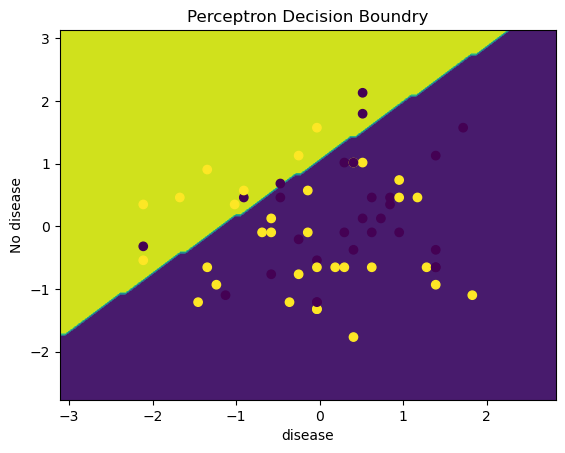

In [27]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    perc,x_test,response_method='predict',
    xlabel='disease',ylabel='No disease'
)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.title("Perceptron Decision Boundry")
plt.show()

In [28]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,confusion_matrix,precision_score
y_pred = perc.predict(x_test)
# y_pred_proba=perc.predict_proba(x_test)
print(f"accuracy :{accuracy_score(y_test,y_pred)}")
print(f"precision :{precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall :{recall_score(y_test,y_pred,average='weighted')}")
print(f"F1_score :{f1_score(y_test,y_pred,average='weighted')}")



accuracy :0.5081967213114754
precision :0.5528583438419504
Recall :0.5081967213114754
F1_score :0.4659939227970139


In [29]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(3,),
                  max_iter=10000,
                  random_state=42
                  ,activation='relu',
                  alpha=0.01,)
mlp.fit(x_train,y_train)


MLPClassifier(alpha=0.01, hidden_layer_sizes=(3,), max_iter=10000,
              random_state=42)

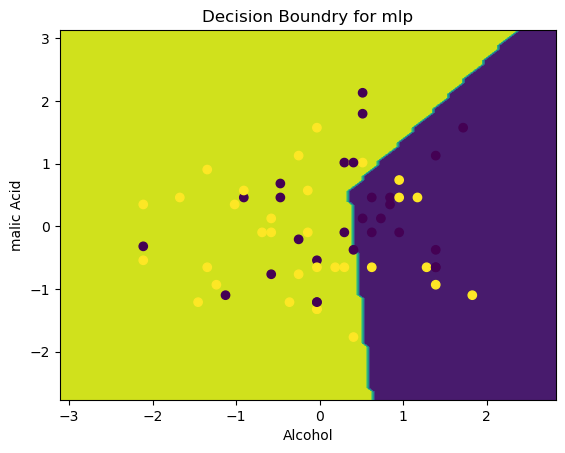

In [30]:
DecisionBoundaryDisplay.from_estimator(
    mlp,x_test,response_method='predict',
    xlabel='Alcohol',ylabel='malic Acid'
)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.title("Decision Boundry for mlp")
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "hidden_layer_sizes":[(5,),(10,),(20,)],
    "activation":['relu','tanh','logistic'],
    "alpha":[0.0001,0.001,0.01,0.1]
}
mlp=MLPClassifier(
                  max_iter=1000,
                  random_state=42)
grid=GridSearchCV(mlp,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(5,), (10,), (20,)]},
             scoring='accuracy')

In [32]:
best_mlp=grid.best_estimator_

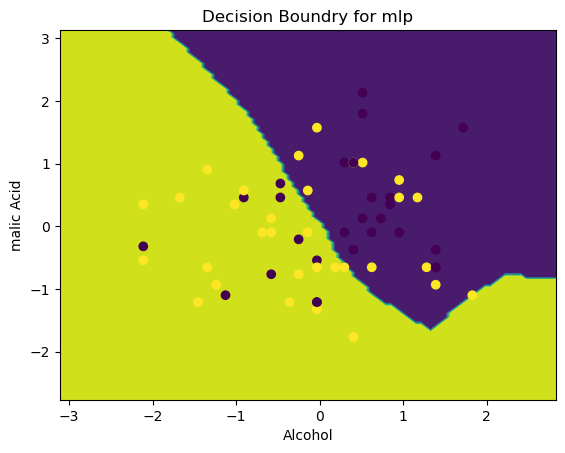

In [33]:

DecisionBoundaryDisplay.from_estimator(
    best_mlp,x_test,response_method='predict',
    xlabel='Alcohol',ylabel='malic Acid'
)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.title("Decision Boundry for mlp")
plt.show()


In [34]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,confusion_matrix,precision_score
y_pred = best_mlp.predict(x_test)
# y_pred_proba=perc.predict_proba(x_test)
print(f"accuracy :{accuracy_score(y_test,y_pred)*100}")
print(f"precision :{precision_score(y_test,y_pred,average='weighted')*100}")
print(f"Recall :{recall_score(y_test,y_pred,average='weighted')*100}")
print(f"F1_score :{f1_score(y_test,y_pred,average='weighted')*100}")



accuracy :63.934426229508205
precision :64.18826017979904
Recall :63.934426229508205
F1_score :63.99272187676653


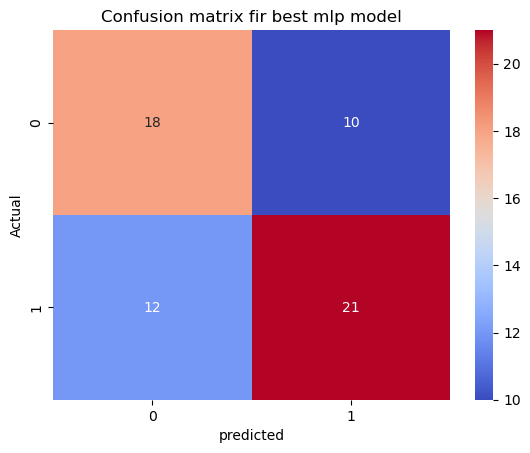

In [35]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix fir best mlp model")
plt.show()
